<a href="https://colab.research.google.com/github/mssamoilenko/AnlDataPract/blob/main/AnlPrakt5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практична робота №5

## Тема: Багаторукі бандити і дизайнер-новатор. Проведення тесту для довільної кількості варіантів.

## Мета роботи: закріплення навичок проведення тесту для довільної кількості варіантів із використанням алгоритму ϵ-жадібного бандиту, візуалізації та аналізу результатів тесту.

## Варіант №2

## Завдання

1. Завантажити дані індивідуального варіанту за посиланням на порталі
дистанційної освіти, використовуючи Pandas відобразити перші 5 рядків.

2. Запрограмувати алгоритм 𝜖-жадібного бандита. Встановити 𝜖 = 0,1.
3. При проведені тесту із 𝜖-жадібним бандитом всі дані не є доступними
відразу, натомість ви показуєте користувачам різні сторінки та збираєте
дані в режимі онлайн. Використовуючи запрограмований алгоритм 𝜖
жадібного бандита, зібрати як мінімум 300 прикладів. Приклади брати по
одному з даних за індивідуальним варіантом.
4. Показати:

a. Діаграму, де зобразити скільки разів було показано кожну із сторінок
і (на ній же) кількість відправлених листів для кожної із сторінок

b. Графік відношення відправлених листів до показів сторінки (для
кожної із сторінок) із часом. Для зображення використовувати
сукупні дані зібрані алгоритмом, за час взяти ітерацію.

5. Зазначити, який варіант є кращим.

    1. Згенерувати рівномірно розподілене випадкове число в інтервалі між 0 та 1.
    2. Якщо число знаходиться між 0 та 𝜖 (де 𝜖 (епсілон) — це число між 0 та 1 у типовій ситуації досить мале), випадково обрати один з варіантів іконки Gmail (№1, 2, 3, 4…).
    3. Якщо число більше або дорівнює 𝜖, то показати будь-яку пропозицію, яка дотепер мала найвище відношення відправлених листів.

## Хід роботи

1. Завантажую дані індивідуального варіанту за посиланням на порталі
дистанційної освіти, використовуючи Pandas відображаю перші 5 рядків.


In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_names = ['1.txt', '2.txt', '3.txt', '4.txt', '5.txt']

# Завантаження даних
data = [np.loadtxt(f) for f in file_names]
min_len = min(map(len, data))

# Створення DataFrame
clicks_df = pd.DataFrame(
    {str(i): data[i-1][:min_len] for i in range(1, 6)}
)

print(f"Розмірність даних: {clicks_df.shape}")
print(clicks_df.head())

Розмірність даних: (1000, 5)
     1    2    3    4    5
0  0.0  0.0  0.0  1.0  1.0
1  1.0  1.0  0.0  1.0  0.0
2  1.0  1.0  1.0  1.0  0.0
3  1.0  1.0  1.0  1.0  1.0
4  0.0  1.0  1.0  1.0  1.0


2. Програмую алгоритм 𝜖-жадібного бандита. Встановлюю 𝜖 = 0,1.

In [158]:
# Початкові параметри
epsilon = 0.1
n_variants = clicks_df.shape[1]
n_iterations = 300

In [159]:
# Лічильники
clicks = np.zeros(n_variants)     # кількість кліків
shows = np.zeros(n_variants)      # кількість показів
conversion_history = {i: [] for i in range(n_variants)}  # історія відгуків

# Алгоритм 𝜖-жадібного бандита
for t in range(n_iterations):
    # Вибір: дослідження чи використання
    if np.random.rand() < epsilon:
        chosen = np.random.randint(0, n_variants)  # випадковий варіант
    else:
        success_rates = clicks / (shows + 1e-5)    # коеф. кліків
        chosen = np.argmax(success_rates)          # найкращий варіант

    result = clicks_df.iloc[t % min_len, chosen]

    # Оновлення статистики
    shows[chosen] += 1
    clicks[chosen] += result

    # Зберігаємо поточні коефіцієнти для графіка
    for i in range(n_variants):
        if shows[i] > 0:
            conversion_history[i].append(clicks[i] / shows[i])
        else:
            conversion_history[i].append(0)

In [160]:
print("\nРезультати:")
for i in range(n_variants):
    print(f"Варіант {i+1}: показів = {int(shows[i])}, кліків = {int(clicks[i])}, успішність = {clicks[i]/shows[i]:.3f}")

best_variant = np.argmax(clicks / (shows + 1e-5)) + 1
print(f"\nНайкращий варіант: {best_variant}")


Результати:
Варіант 1: показів = 51, кліків = 37, успішність = 0.725
Варіант 2: показів = 3, кліків = 2, успішність = 0.667
Варіант 3: показів = 13, кліків = 9, успішність = 0.692
Варіант 4: показів = 225, кліків = 194, успішність = 0.862
Варіант 5: показів = 8, кліків = 5, успішність = 0.625

Найкращий варіант: 4


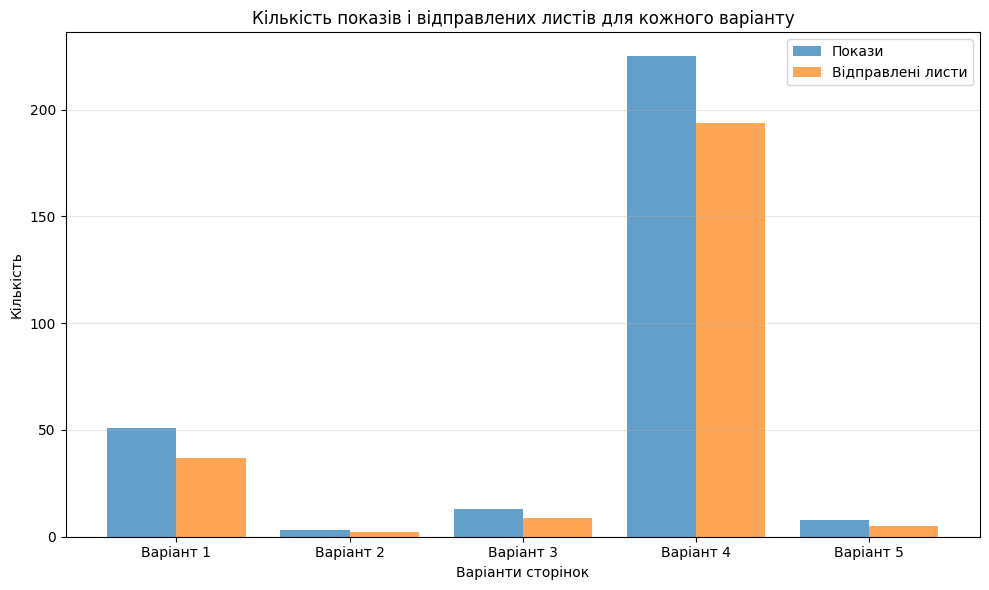

In [161]:
# a) Діаграма показів та кліків
plt.figure(figsize=(10, 6))
x = np.arange(1, n_variants + 1)
plt.bar(x - 0.2, shows, width=0.4, label='Покази', alpha=0.7)
plt.bar(x + 0.2, clicks, width=0.4, label='Відправлені листи', alpha=0.7)
plt.xlabel('Варіанти сторінок')
plt.ylabel('Кількість')
plt.title('Кількість показів і відправлених листів для кожного варіанту')
plt.xticks(x, [f'Варіант {i}' for i in range(1, n_variants+1)])
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

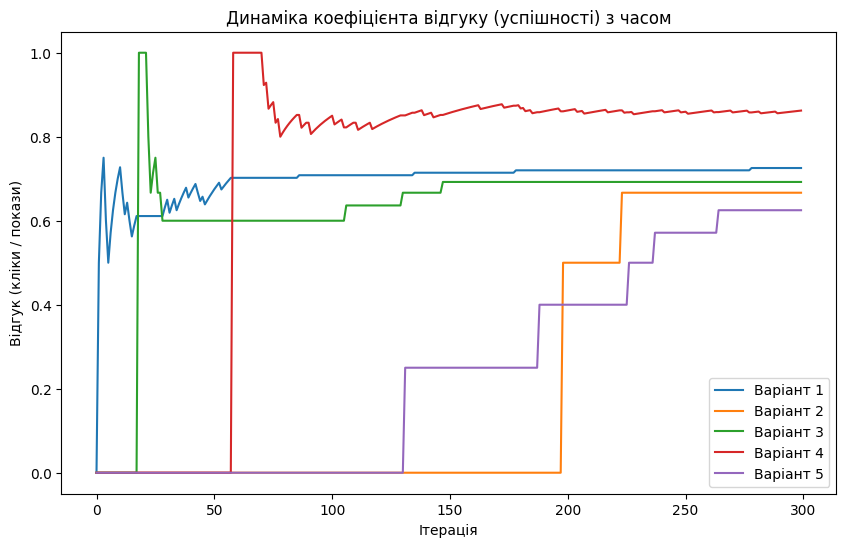

In [162]:
# b) Графік успішності (коеф. кліків)
plt.figure(figsize=(10,6))
for i in range(n_variants):
    plt.plot(conversion_history[i], label=f'Варіант {i+1}')
plt.xlabel('Ітерація')
plt.ylabel('Відгук (кліки / покази)')
plt.title('Динаміка коефіцієнта відгуку (успішності) з часом')
plt.legend()
plt.show()